In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from KDEpy import FFTKDE
import pomegranate

from scipy.stats import beta

In [2]:
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']
df = pd.read_csv('../../data/subset_data.csv', index_col=0)

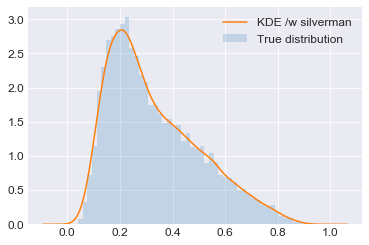

In [3]:
data = df['ES'].to_numpy()

plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)

# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data).evaluate()
plt.plot(x, y, label='KDE /w silverman')

# Compute density estimates using 'ISJ' - Improved Sheather Jones
# y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate(x)
# plt.plot(x, y, label='KDE /w ISJ')

plt.legend()
plt.show()

# Pomegranate

In [41]:
# model = pomegranate.GeneralMixtureModel.from_samples(
#     pomegranate.BetaDistribution, n_components=2, X=data.reshape(-1, 1)
# )

# model.probability(data.reshape(-1, 1))

array([nan, nan, nan, ..., nan, nan, nan])

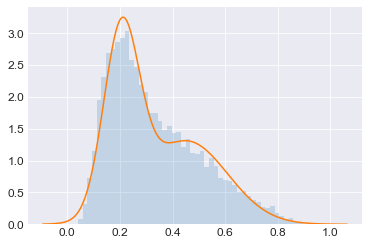

In [43]:
# model = pomegranate.GeneralMixtureModel.from_samples(
#     pomegranate.NormalDistribution, n_components=2, X=data.reshape(-1, 1)
# )

# plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)
# plt.plot(x, model.probability(x))
# plt.show()

# BayesOpt

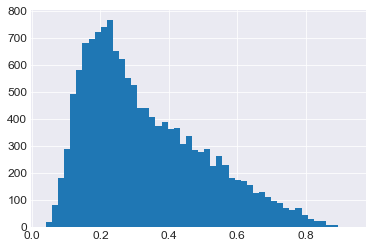

In [4]:
plt.hist(data, bins=50)
plt.show()

# Mixture of two

In [5]:
from bayes_opt import BayesianOptimization


def mixture2_prob(a1, b1, a2, b2, w):
    beta1_loss = beta.pdf(data, a1, b1)
    beta2_loss = beta.pdf(data, a2, b2)
    
    return np.log(w * beta1_loss + (1 - w) * beta2_loss).sum()


def mixture2_pdf(a1, b1, a2, b2, w, x=np.linspace(0, 1, 100)):
    return w * beta.pdf(x, a1, b1) + (1 - w) * beta.pdf(x, a2, b2)

In [6]:
optimizer = BayesianOptimization(
    f=mixture2_prob,
    pbounds={
        'a1': (1.0, 10.0),
        'b1': (1.0, 10.0),
        'a2': (1.0, 10.0),
        'b2': (1.0, 10.0),
        'w': (0.0, 1.0)
    },
    random_state=1
)

optimizer.maximize(
    init_points=20,
    n_iter=1000
)

|   iter    |  target   |    a1     |    a2     |    b1     |    b2     |     w     |
-------------------------------------------------------------------------------------
|  1        | -3.767e+0 |  4.753    |  7.483    |  1.001    |  3.721    |  0.1468   |
|  2        |  5.765e+0 |  1.831    |  2.676    |  4.11     |  4.571    |  0.5388   |
|  3        | -5.529e+0 |  4.773    |  7.167    |  2.84     |  8.903    |  0.02739  |
|  4        | -2.013e+0 |  7.034    |  4.756    |  6.028    |  2.263    |  0.1981   |
|  5        | -4.223e+0 |  8.207    |  9.714    |  3.821    |  7.231    |  0.8764   |
|  6        | -2.17e+04 |  9.051    |  1.765    |  1.351    |  2.528    |  0.8781   |
|  7        |  3.527e+0 |  1.885    |  4.79     |  9.621    |  5.798    |  0.6919   |
|  8        |  3.258e+0 |  3.84     |  7.179    |  8.512    |  1.165    |  0.7501   |
|  9        | -1.237e+0 |  9.9      |  7.733    |  3.524    |  8.104    |  0.1032   |
|  10       | -3.304e+0 |  5.031    |  9.177    |  3.6

|  57       |  5.866e+0 |  2.323    |  2.205    |  4.37     |  4.94     |  0.3963   |
|  58       |  5.931e+0 |  2.35     |  2.314    |  4.015    |  5.053    |  0.4543   |
|  59       |  5.931e+0 |  2.306    |  2.316    |  3.968    |  5.043    |  0.4577   |
|  60       |  5.935e+0 |  2.301    |  2.328    |  3.963    |  5.079    |  0.4548   |
|  61       |  5.942e+0 |  2.311    |  2.346    |  3.957    |  5.153    |  0.4451   |
|  62       |  5.962e+0 |  2.347    |  2.383    |  3.937    |  5.367    |  0.4217   |
|  63       |  5.973e+0 |  2.364    |  2.399    |  3.917    |  5.502    |  0.4117   |
|  64       |  5.984e+0 |  2.376    |  2.413    |  3.885    |  5.642    |  0.4013   |
|  65       |  5.991e+0 |  2.377    |  2.422    |  3.836    |  5.773    |  0.3844   |
|  66       |  5.992e+0 |  2.369    |  2.425    |  3.805    |  5.82     |  0.3731   |
|  67       |  5.989e+0 |  2.375    |  2.426    |  3.82     |  5.823    |  0.3696   |
|  68       |  6.002e+0 |  2.349    |  2.421    |  3.7

|  114      |  5.98e+03 |  2.435    |  2.815    |  4.198    |  6.92     |  0.7355   |
|  115      |  6.122e+0 |  2.373    |  2.757    |  3.375    |  6.724    |  0.3535   |
|  116      |  6.124e+0 |  2.377    |  2.747    |  3.377    |  6.749    |  0.3561   |
|  117      |  6.127e+0 |  2.391    |  2.744    |  3.346    |  6.75     |  0.3423   |
|  118      |  6.133e+0 |  2.416    |  2.747    |  3.295    |  6.781    |  0.3249   |
|  119      |  6.137e+0 |  2.435    |  2.761    |  3.23     |  6.8      |  0.2992   |
|  120      |  6.136e+0 |  2.437    |  2.77     |  3.197    |  6.811    |  0.2837   |
|  121      |  5.952e+0 |  2.214    |  2.341    |  3.851    |  5.563    |  0.5579   |
|  122      |  6.139e+0 |  2.44     |  2.767    |  3.205    |  6.8      |  0.2933   |
|  123      |  6.141e+0 |  2.452    |  2.762    |  3.208    |  6.792    |  0.3002   |
|  124      |  5.982e+0 |  2.185    |  2.613    |  3.246    |  7.06     |  0.3055   |
|  125      |  6.14e+03 |  2.49     |  2.731    |  3.1

|  171      |  6.003e+0 |  2.405    |  2.932    |  3.875    |  7.04     |  0.3034   |
|  172      |  5.803e+0 |  2.029    |  3.099    |  4.268    |  6.945    |  0.5256   |
|  173      |  6.17e+03 |  2.552    |  2.866    |  3.0      |  7.041    |  0.2731   |
|  174      |  6.169e+0 |  2.544    |  2.891    |  3.004    |  7.046    |  0.2771   |
|  175      |  6.17e+03 |  2.556    |  2.875    |  3.001    |  7.043    |  0.2789   |
|  176      |  6.169e+0 |  2.539    |  2.861    |  2.994    |  7.035    |  0.2745   |
|  177      |  6.168e+0 |  2.536    |  2.871    |  3.016    |  7.02     |  0.2726   |
|  178      |  5.914e+0 |  2.189    |  2.661    |  4.346    |  7.497    |  0.9143   |
|  179      |  6.03e+03 |  2.436    |  2.402    |  3.35     |  6.361    |  0.3691   |
|  180      |  6.167e+0 |  2.545    |  2.829    |  3.049    |  7.011    |  0.2828   |
|  181      |  6.167e+0 |  2.539    |  2.889    |  3.045    |  7.022    |  0.2823   |
|  182      |  6.17e+03 |  2.537    |  2.856    |  3.0

|  229      |  6.072e+0 |  2.981    |  3.242    |  3.748    |  7.589    |  0.356    |
|  230      |  6.185e+0 |  2.63     |  3.084    |  3.234    |  7.581    |  0.3424   |
|  231      |  6.186e+0 |  2.576    |  3.034    |  3.234    |  7.431    |  0.3166   |
|  232      |  5.918e+0 |  2.177    |  2.513    |  4.199    |  6.795    |  0.8886   |
|  233      |  6.057e+0 |  2.776    |  2.471    |  3.396    |  6.802    |  0.3194   |
|  234      |  6.195e+0 |  2.855    |  3.101    |  3.387    |  7.706    |  0.3366   |
|  235      |  6.189e+0 |  2.806    |  2.884    |  3.294    |  7.322    |  0.3255   |
|  236      |  6.022e+0 |  2.78     |  3.116    |  3.638    |  7.731    |  0.1982   |
|  237      |  6.07e+03 |  3.411    |  3.283    |  3.738    |  7.478    |  0.2379   |
|  238      |  6.208e+0 |  3.324    |  2.924    |  3.376    |  7.412    |  0.2678   |
|  239      |  6.058e+0 |  2.395    |  3.421    |  3.68     |  7.98     |  0.5134   |
|  240      |  6.206e+0 |  3.168    |  2.945    |  3.3

|  287      |  6.246e+0 |  2.762    |  3.038    |  3.537    |  8.323    |  0.4124   |
|  288      |  6.239e+0 |  2.731    |  3.004    |  3.51     |  8.326    |  0.4254   |
|  289      |  6.205e+0 |  3.165    |  3.204    |  3.136    |  7.818    |  0.2515   |
|  290      |  6.253e+0 |  2.744    |  3.104    |  3.584    |  8.362    |  0.3891   |
|  291      |  5.985e+0 |  2.951    |  2.884    |  3.894    |  7.933    |  0.2388   |
|  292      |  6.249e+0 |  2.705    |  3.115    |  3.563    |  8.343    |  0.3982   |
|  293      |  6.101e+0 |  2.177    |  2.712    |  3.244    |  6.67     |  0.3908   |
|  294      |  6.035e+0 |  2.45     |  3.295    |  3.772    |  8.359    |  0.6577   |
|  295      |  6.179e+0 |  3.05     |  3.455    |  3.621    |  8.44     |  0.3154   |
|  296      |  6.258e+0 |  2.794    |  3.094    |  3.606    |  8.422    |  0.3781   |
|  297      |  6.195e+0 |  3.195    |  3.235    |  3.111    |  8.473    |  0.3363   |
|  298      |  6.264e+0 |  3.024    |  3.194    |  3.5

|  345      |  5.448e+0 |  3.316    |  2.844    |  3.607    |  9.553    |  0.6452   |
|  346      |  6.263e+0 |  3.189    |  3.21     |  3.389    |  8.454    |  0.3278   |
|  347      |  5.723e+0 |  2.31     |  2.358    |  4.413    |  9.142    |  0.7079   |
|  348      |  6.284e+0 |  3.009    |  3.147    |  3.268    |  8.94     |  0.3334   |
|  349      |  6.122e+0 |  2.25     |  3.327    |  3.616    |  8.4      |  0.3928   |
|  350      |  6.069e+0 |  2.967    |  2.691    |  3.948    |  9.578    |  0.5396   |
|  351      |  6.185e+0 |  2.992    |  3.023    |  3.589    |  8.081    |  0.4252   |
|  352      |  6.137e+0 |  2.851    |  3.241    |  3.57     |  8.161    |  0.4379   |
|  353      |  6.014e+0 |  2.295    |  3.412    |  3.851    |  8.681    |  0.3627   |
|  354      |  6.165e+0 |  2.703    |  2.859    |  3.831    |  9.337    |  0.481    |
|  355      |  5.887e+0 |  2.857    |  2.824    |  4.242    |  8.741    |  0.3417   |
|  356      |  5.652e+0 |  2.41     |  2.673    |  4.4

|  403      |  5.839e+0 |  1.798    |  3.257    |  3.472    |  9.832    |  0.8337   |
|  404      |  6.194e+0 |  3.098    |  3.128    |  3.448    |  8.637    |  0.2405   |
|  405      |  6.055e+0 |  3.128    |  2.59     |  4.021    |  8.604    |  0.4483   |
|  406      |  6.287e+0 |  3.084    |  3.276    |  3.393    |  8.682    |  0.32     |
|  407      |  6.11e+03 |  3.352    |  2.893    |  3.912    |  7.672    |  0.2231   |
|  408      |  6.286e+0 |  3.064    |  3.216    |  3.368    |  8.611    |  0.3171   |
|  409      |  6.134e+0 |  3.174    |  2.724    |  4.172    |  7.489    |  0.3666   |
|  410      |  6.192e+0 |  2.492    |  2.969    |  3.587    |  9.313    |  0.5817   |
|  411      |  5.876e+0 |  1.822    |  3.719    |  3.296    |  9.45     |  0.8056   |
|  412      |  6.239e+0 |  3.151    |  3.1      |  3.002    |  8.376    |  0.2763   |
|  413      |  6.277e+0 |  3.251    |  3.244    |  3.618    |  8.551    |  0.3283   |
|  414      |  6.183e+0 |  3.123    |  2.962    |  3.4

|  461      |  6.088e+0 |  2.917    |  2.76     |  4.398    |  7.67     |  0.4428   |
|  462      |  6.32e+03 |  2.763    |  3.393    |  3.32     |  9.446    |  0.3788   |
|  463      |  6.106e+0 |  3.166    |  2.716    |  4.106    |  8.932    |  0.5309   |
|  464      |  6.319e+0 |  2.758    |  3.414    |  3.33     |  9.451    |  0.3769   |
|  465      |  6.175e+0 |  2.45     |  2.974    |  3.269    |  9.701    |  0.5043   |
|  466      |  6.3e+03  |  3.045    |  3.318    |  3.245    |  8.966    |  0.3108   |
|  467      |  6.32e+03 |  2.785    |  3.401    |  3.318    |  9.431    |  0.3695   |
|  468      |  6.202e+0 |  2.662    |  2.945    |  3.787    |  8.011    |  0.4346   |
|  469      |  6.32e+03 |  2.787    |  3.404    |  3.316    |  9.441    |  0.3691   |
|  470      |  6.321e+0 |  2.82     |  3.395    |  3.319    |  9.412    |  0.3591   |
|  471      |  6.32e+03 |  2.824    |  3.388    |  3.313    |  9.389    |  0.3582   |
|  472      |  6.107e+0 |  2.9      |  2.77     |  3.7

|  518      |  6.054e+0 |  3.614    |  2.73     |  4.264    |  9.015    |  0.3554   |
|  519      |  6.34e+03 |  2.852    |  3.506    |  3.388    |  9.866    |  0.3893   |
|  520      |  6.197e+0 |  3.884    |  3.045    |  3.312    |  7.607    |  0.2453   |
|  521      |  6.199e+0 |  2.727    |  3.259    |  2.954    |  8.23     |  0.3344   |
|  522      |  6.341e+0 |  2.851    |  3.495    |  3.364    |  9.861    |  0.383    |
|  523      |  6.342e+0 |  2.869    |  3.511    |  3.39     |  9.847    |  0.3756   |
|  524      |  6.345e+0 |  2.882    |  3.511    |  3.389    |  9.896    |  0.3682   |
|  525      |  6.348e+0 |  2.897    |  3.525    |  3.395    |  9.981    |  0.3594   |
|  526      |  6.35e+03 |  2.903    |  3.532    |  3.402    |  10.0     |  0.3606   |
|  527      |  6.35e+03 |  2.92     |  3.55     |  3.426    |  10.0     |  0.3606   |
|  528      |  6.343e+0 |  2.907    |  3.486    |  3.384    |  9.835    |  0.3581   |
|  529      |  6.346e+0 |  2.921    |  3.498    |  3.4

|  575      |  6.038e+0 |  3.058    |  3.387    |  4.474    |  9.416    |  0.6425   |
|  576      |  6.364e+0 |  3.189    |  3.491    |  3.63     |  10.0     |  0.3631   |
|  577      |  6.365e+0 |  3.244    |  3.5      |  3.665    |  10.0     |  0.3613   |
|  578      |  6.365e+0 |  3.258    |  3.501    |  3.687    |  10.0     |  0.3615   |
|  579      |  6.292e+0 |  2.93     |  3.226    |  3.277    |  8.804    |  0.3233   |
|  580      |  6.343e+0 |  2.94     |  3.445    |  3.4      |  9.779    |  0.3629   |
|  581      |  6.364e+0 |  3.212    |  3.499    |  3.646    |  10.0     |  0.3585   |
|  582      |  6.279e+0 |  2.957    |  3.275    |  3.652    |  8.959    |  0.416    |
|  583      |  6.169e+0 |  2.257    |  3.251    |  3.758    |  8.686    |  0.5586   |
|  584      |  5.384e+0 |  3.666    |  3.607    |  4.298    |  9.465    |  0.6293   |
|  585      |  6.14e+03 |  2.352    |  2.777    |  3.503    |  7.957    |  0.4488   |
|  586      |  5.976e+0 |  2.709    |  2.961    |  4.0

|  633      |  6.163e+0 |  2.934    |  3.086    |  3.572    |  8.284    |  0.2505   |
|  634      |  6.048e+0 |  3.146    |  3.701    |  3.573    |  9.029    |  0.4001   |
|  635      |  6.222e+0 |  3.911    |  2.933    |  3.808    |  7.94     |  0.2253   |
|  636      |  6.364e+0 |  3.236    |  3.514    |  3.653    |  10.0     |  0.3571   |
|  637      |  6.004e+0 |  1.992    |  2.711    |  3.011    |  7.316    |  0.5747   |
|  638      |  6.322e+0 |  3.589    |  3.377    |  3.908    |  9.184    |  0.3075   |
|  639      |  6.245e+0 |  2.566    |  3.201    |  3.84     |  9.121    |  0.5367   |
|  640      |  6.24e+03 |  3.275    |  3.022    |  3.298    |  7.806    |  0.2565   |
|  641      |  6.251e+0 |  2.52     |  3.623    |  3.495    |  9.88     |  0.5271   |
|  642      |  6.02e+03 |  3.657    |  2.623    |  3.622    |  7.947    |  0.2605   |
|  643      |  6.214e+0 |  2.386    |  3.081    |  3.409    |  8.138    |  0.4439   |
|  644      |  6.211e+0 |  2.918    |  3.059    |  3.7

|  691      |  6.343e+0 |  2.958    |  3.434    |  3.42     |  9.769    |  0.3687   |
|  692      |  6.293e+0 |  2.916    |  3.203    |  3.567    |  8.834    |  0.3716   |
|  693      |  6.15e+03 |  3.04     |  3.513    |  3.556    |  8.489    |  0.3295   |
|  694      |  6.206e+0 |  2.443    |  3.557    |  3.571    |  9.629    |  0.3635   |
|  695      |  6.242e+0 |  3.29     |  3.019    |  3.318    |  7.836    |  0.2593   |
|  696      |  6.316e+0 |  2.892    |  3.609    |  3.684    |  9.915    |  0.3641   |
|  697      |  6.093e+0 |  2.421    |  2.903    |  3.88     |  7.562    |  0.41     |
|  698      |  6.325e+0 |  3.468    |  3.566    |  3.717    |  9.77     |  0.3628   |
|  699      |  6.293e+0 |  3.58     |  3.209    |  4.228    |  9.093    |  0.3445   |
|  700      |  6.364e+0 |  3.251    |  3.515    |  3.701    |  10.0     |  0.3628   |
|  701      |  6.197e+0 |  3.24     |  3.576    |  3.678    |  9.167    |  0.3867   |
|  702      |  6.282e+0 |  3.364    |  3.216    |  4.1

|  749      |  6.356e+0 |  3.026    |  3.505    |  3.65     |  9.999    |  0.3797   |
|  750      |  6.323e+0 |  2.819    |  3.413    |  3.327    |  9.49     |  0.3512   |
|  751      |  6.324e+0 |  3.578    |  3.416    |  3.786    |  9.259    |  0.3268   |
|  752      |  6.208e+0 |  2.294    |  3.121    |  2.979    |  8.073    |  0.3176   |
|  753      |  6.21e+03 |  2.848    |  3.29     |  2.834    |  8.395    |  0.3005   |
|  754      |  6.328e+0 |  2.816    |  3.376    |  3.346    |  9.595    |  0.3829   |
|  755      |  6.341e+0 |  3.142    |  3.408    |  3.657    |  9.649    |  0.3828   |
|  756      |  6.345e+0 |  2.958    |  3.403    |  3.627    |  9.831    |  0.4107   |
|  757      |  6.277e+0 |  3.459    |  3.163    |  4.365    |  9.296    |  0.3978   |
|  758      |  6.343e+0 |  3.05     |  3.382    |  3.712    |  9.721    |  0.3892   |
|  759      |  6.345e+0 |  3.715    |  3.674    |  3.997    |  10.0     |  0.317    |
|  760      |  6.356e+0 |  3.05     |  3.449    |  3.6

|  807      |  6.138e+0 |  2.294    |  2.953    |  3.281    |  9.314    |  0.4481   |
|  808      |  6.291e+0 |  2.867    |  3.218    |  3.487    |  8.799    |  0.358    |
|  809      |  6.331e+0 |  3.241    |  3.492    |  3.343    |  9.592    |  0.317    |
|  810      |  6.317e+0 |  2.652    |  3.427    |  3.42     |  9.713    |  0.4489   |
|  811      |  6.296e+0 |  3.151    |  3.306    |  3.316    |  8.958    |  0.3304   |
|  812      |  6.3e+03  |  3.127    |  3.483    |  3.636    |  9.341    |  0.3073   |
|  813      |  6.232e+0 |  3.086    |  3.138    |  3.343    |  7.918    |  0.2501   |
|  814      |  5.974e+0 |  1.618    |  3.538    |  2.715    |  9.838    |  0.4034   |
|  815      |  6.3e+03  |  4.223    |  3.402    |  4.071    |  9.054    |  0.3109   |
|  816      |  6.328e+0 |  4.199    |  3.275    |  4.439    |  9.337    |  0.3047   |
|  817      |  6.246e+0 |  2.323    |  3.179    |  3.113    |  8.632    |  0.3923   |
|  818      |  6.319e+0 |  2.838    |  3.41     |  3.3

|  865      |  6.026e+0 |  2.315    |  3.579    |  3.24     |  9.331    |  0.6214   |
|  866      |  6.299e+0 |  2.551    |  3.344    |  3.575    |  9.792    |  0.4367   |
|  867      |  6.292e+0 |  2.968    |  3.186    |  4.064    |  9.683    |  0.469    |
|  868      |  6.239e+0 |  2.679    |  3.448    |  3.784    |  9.321    |  0.5124   |
|  869      |  6.324e+0 |  3.855    |  3.455    |  3.986    |  9.253    |  0.2837   |
|  870      |  6.27e+03 |  3.197    |  3.101    |  3.532    |  8.275    |  0.3104   |
|  871      |  6.237e+0 |  3.336    |  3.022    |  3.272    |  7.807    |  0.2627   |
|  872      |  6.089e+0 |  2.819    |  2.733    |  2.83     |  7.068    |  0.1815   |
|  873      |  6.282e+0 |  3.621    |  3.079    |  3.981    |  8.65     |  0.3097   |
|  874      |  6.234e+0 |  3.065    |  2.98     |  4.152    |  8.89     |  0.4485   |
|  875      |  6.287e+0 |  2.905    |  3.377    |  3.247    |  9.013    |  0.2899   |
|  876      |  6.217e+0 |  2.827    |  3.482    |  3.4

|  923      |  6.333e+0 |  3.669    |  3.647    |  4.018    |  9.889    |  0.3331   |
|  924      | -5.294e+0 |  7.024    |  9.976    |  9.433    |  2.641    |  0.7798   |
|  925      |  6.168e+0 |  3.04     |  3.333    |  3.335    |  9.191    |  0.4467   |
|  926      |  6.211e+0 |  3.357    |  2.978    |  3.336    |  7.517    |  0.2698   |
|  927      |  6.271e+0 |  3.206    |  3.116    |  3.52     |  8.295    |  0.3127   |
|  928      |  6.186e+0 |  2.105    |  3.245    |  2.892    |  9.023    |  0.4981   |
|  929      |  6.217e+0 |  4.117    |  2.97     |  3.54     |  7.592    |  0.2457   |
|  930      |  6.088e+0 |  3.181    |  2.99     |  3.219    |  8.166    |  0.402    |
|  931      |  6.365e+0 |  3.256    |  3.497    |  3.685    |  10.0     |  0.3625   |
|  932      |  6.315e+0 |  3.432    |  3.567    |  3.394    |  9.529    |  0.2636   |
|  933      |  6.326e+0 |  3.741    |  3.534    |  4.052    |  9.57     |  0.2976   |
|  934      |  6.242e+0 |  3.507    |  2.985    |  4.1

|  981      | -632.8    |  9.551    |  1.846    |  4.324    |  9.633    |  0.09683  |
|  982      |  6.271e+0 |  3.933    |  3.544    |  4.587    |  9.678    |  0.3128   |
|  983      |  6.32e+03 |  4.176    |  3.438    |  4.18     |  9.137    |  0.28     |
|  984      |  6.326e+0 |  3.748    |  3.472    |  3.955    |  9.344    |  0.2953   |
|  985      |  6.271e+0 |  3.201    |  3.13     |  3.51     |  8.307    |  0.3108   |
|  986      |  6.366e+0 |  3.297    |  3.517    |  3.687    |  10.0     |  0.354    |
|  987      |  6.16e+03 |  2.535    |  2.757    |  3.118    |  7.534    |  0.3796   |
|  988      |  6.128e+0 |  3.315    |  3.293    |  3.917    |  9.667    |  0.2523   |
|  989      |  6.351e+0 |  4.424    |  3.37     |  4.368    |  9.354    |  0.2806   |
|  990      |  6.015e+0 |  2.282    |  3.75     |  3.024    |  9.1      |  0.518    |
|  991      |  6.101e+0 |  3.206    |  3.066    |  4.238    |  8.4      |  0.5239   |
|  992      |  5.908e+0 |  3.221    |  3.578    |  3.8

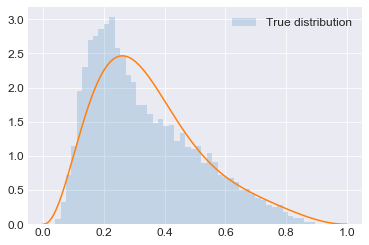

In [6]:
# 400 iterations?

a1, b1, a2, b2, w = [v for k, v in optimizer.max['params'].items()]

x = np.linspace(0, 1, 1000)

plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)
plt.plot(x, mixture2_pdf(a1, b1, a2, b2, w, x))

plt.legend()
plt.show()

In [7]:
a1, b1, a2, b2, w

(3.37483422480515,
 3.1681488553638433,
 3.362827683915399,
 8.228304959004687,
 0.27532644797412226)

In [8]:
mixture2_prob(a1, b1, a2, b2, w)

6179.569265858057

In [9]:
mixture2_prob(1.8, 5.7, 1.8, 5.7, 1)

3102.858200574662

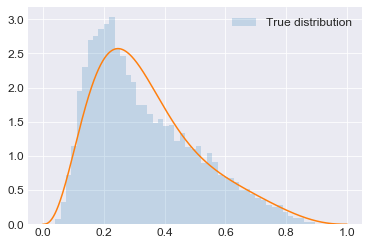

In [7]:
# 1000 iterations

a1, b1, a2, b2, w = [v for k, v in optimizer.max['params'].items()]

x = np.linspace(0, 1, 1000)

plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)
plt.plot(x, mixture2_pdf(a1, b1, a2, b2, w, x))

plt.legend()
plt.show()

In [8]:
a1, b1, a2, b2, w

(3.2971600120568945,
 3.5166301317342175,
 3.687244500742912,
 9.9995820199843,
 0.35403917825367287)

# Mixture of three

In [10]:
def mixture3_prob(a1, b1, a2, b2, a3, b3, w1, w2):
    beta1_prob = beta.pdf(data, a1, b1)
    beta2_prob = beta.pdf(data, a2, b2)
    beta3_prob = beta.pdf(data, a3, b3)
    
    return np.log(
        (w1 * beta1_prob + w2 * beta2_prob + (2 - w1 - w2) * beta3_prob) / 2
    ).sum()


def mixture3_pdf(a1, b1, a2, b2, a3, b3, w1, w2, x=np.linspace(0, 1, 100)):
    return (w1 * beta.pdf(x, a1, b1) 
            + w2 * beta.pdf(x, a2, b2) 
            + (2 - w1 - w2) * beta.pdf(x, a3, b3)) / 2

In [22]:
optimizer = BayesianOptimization(
    f=mixture3_prob,
    pbounds={
        'a1': (1.0, 9.0),
        'b1': (1.0, 9.0),
        'a2': (1.0, 9.0),
        'b2': (1.0, 9.0),
        'a3': (1.0, 9.0),
        'b3': (1.0, 9.0),
        'w1': (0.0, 1.0),
        'w2': (0.0, 1.0)
    },
    random_state=1
)

optimizer.probe(
    params={
        'a1': 3.765,
        'b1': 3.168,
        'a2': 3.363,
        'b2': 8.223,
        'a3': 3.765,
        'b3': 3.168,
        'w1': 0.27,
        'w2': 0.73
    },
    lazy=True
)

optimizer.probe(
    params={
        'a1': 3.297,
        'b1': 3.517,
        'a2': 3.587,
        'b2': 10,
        'a3': 3.297,
        'b3': 3.517,
        'w1': 0.354,
        'w2': 0.646
    },
    lazy=True
)

optimizer.maximize(
    init_points=20,
    n_iter=1000
)

|   iter    |  target   |    a1     |    a2     |    a3     |    b1     |    b2     |    b3     |    w1     |    w2     |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  3.726e+0 |  3.765    |  3.363    |  3.765    |  3.168    |  8.223    |  3.168    |  0.27     |  0.73     |
|  2        |  5.032e+0 |  3.297    |  3.587    |  3.297    |  3.517    |  10.0     |  3.517    |  0.354    |  0.646    |
|  3        |  1.166e+0 |  4.336    |  6.763    |  1.001    |  3.419    |  2.174    |  1.739    |  0.1863   |  0.3456   |
|  4        |  2.988e+0 |  4.174    |  5.311    |  4.354    |  6.482    |  2.636    |  8.025    |  0.02739  |  0.6705   |
|  5        |  5.168e+0 |  4.338    |  5.47     |  2.123    |  2.585    |  7.406    |  8.746    |  0.3134   |  0.6923   |
|  6        | -1.005e+0 |  8.011    |  8.157    |  1.68     |  1.312    |  2.359    |  8.025    |  0.09835  |  0.4211   |
|  7        | -3.249e+0 

|  40       |  6.121e+0 |  6.002    |  5.984    |  2.637    |  8.752    |  4.226    |  6.375    |  0.09512  |  0.2952   |
|  41       |  6.111e+0 |  6.01     |  5.989    |  2.614    |  8.779    |  4.269    |  6.315    |  0.1092   |  0.2805   |
|  42       |  6.104e+0 |  5.873    |  6.004    |  2.649    |  8.7      |  4.09     |  6.473    |  0.07089  |  0.3459   |
|  43       |  6.131e+0 |  5.966    |  5.953    |  2.67     |  8.711    |  4.2      |  6.459    |  0.08271  |  0.3099   |
|  44       |  6.13e+03 |  5.95     |  5.919    |  2.686    |  8.696    |  4.221    |  6.497    |  0.09289  |  0.3139   |
|  45       |  6.168e+0 |  5.952    |  5.939    |  2.676    |  8.662    |  4.237    |  6.469    |  0.0      |  0.3083   |
|  46       |  6.157e+0 |  5.943    |  5.947    |  2.656    |  8.604    |  4.295    |  6.441    |  0.0      |  0.3274   |
|  47       |  6.175e+0 |  5.943    |  5.879    |  2.689    |  8.704    |  4.238    |  6.488    |  0.0      |  0.2864   |
|  48       |  6.173e+0 

|  80       |  6.198e+0 |  5.918    |  6.186    |  2.814    |  8.883    |  4.211    |  6.619    |  0.0      |  0.2792   |
|  81       |  6.199e+0 |  5.911    |  6.211    |  2.818    |  8.893    |  4.209    |  6.618    |  0.0      |  0.276    |
|  82       |  6.198e+0 |  5.908    |  6.212    |  2.817    |  8.897    |  4.214    |  6.614    |  0.0      |  0.2784   |
|  83       |  6.202e+0 |  5.918    |  6.236    |  2.821    |  8.911    |  4.187    |  6.637    |  0.0      |  0.267    |
|  84       |  6.207e+0 |  5.918    |  6.297    |  2.844    |  8.985    |  4.105    |  6.704    |  0.0      |  0.2478   |
|  85       |  6.206e+0 |  5.918    |  6.303    |  2.843    |  8.985    |  4.102    |  6.697    |  0.0      |  0.2466   |
|  86       |  6.209e+0 |  5.921    |  6.284    |  2.848    |  8.983    |  4.114    |  6.724    |  0.0      |  0.2492   |
|  87       |  6.211e+0 |  5.911    |  6.287    |  2.859    |  8.974    |  4.126    |  6.753    |  0.0      |  0.246    |
|  88       |  6.211e+0 

|  120      |  6.221e+0 |  5.871    |  6.292    |  2.902    |  8.997    |  4.156    |  6.872    |  0.0      |  0.2582   |
|  121      |  3.008e+0 |  6.137    |  6.156    |  3.57     |  7.756    |  3.712    |  6.645    |  0.3626   |  0.6227   |
|  122      |  1.464e+0 |  6.737    |  5.832    |  2.762    |  8.363    |  4.623    |  5.272    |  0.3891   |  0.9718   |
|  123      |  5.668e+0 |  5.366    |  5.113    |  2.282    |  8.346    |  3.101    |  6.173    |  0.3111   |  0.4086   |
|  124      |  5.109e+0 |  4.92     |  6.603    |  2.437    |  8.322    |  4.995    |  6.369    |  0.4656   |  0.6734   |
|  125      |  6.221e+0 |  5.87     |  6.288    |  2.899    |  8.997    |  4.155    |  6.871    |  0.0      |  0.2567   |
|  126      |  5.678e+0 |  5.373    |  5.121    |  2.286    |  8.35     |  3.119    |  6.177    |  0.3069   |  0.4076   |
|  127      |  6.221e+0 |  5.868    |  6.296    |  2.903    |  8.998    |  4.154    |  6.872    |  0.0      |  0.2567   |
|  128      |  4.662e+0 

|  162      |  5.501e+0 |  5.221    |  6.166    |  3.08     |  7.358    |  5.108    |  6.952    |  0.5277   |  0.3023   |
|  163      |  5.89e+03 |  5.32     |  6.006    |  2.551    |  7.967    |  4.41     |  7.348    |  0.06733  |  0.2457   |
|  164      |  2.494e+0 |  4.827    |  5.738    |  1.829    |  2.442    |  7.038    |  8.796    |  0.6529   |  0.777    |
|  165      |  5.003e+0 |  5.438    |  6.034    |  2.17     |  7.851    |  5.131    |  6.603    |  0.5608   |  0.6244   |
|  166      |  5.663e+0 |  5.129    |  5.551    |  3.303    |  8.294    |  4.444    |  7.84     |  0.3471   |  0.5285   |
|  167      |  2.88e+03 |  4.777    |  6.672    |  2.54     |  8.512    |  4.853    |  6.673    |  0.9591   |  0.8682   |
|  168      |  5.635e+0 |  5.25     |  6.152    |  3.028    |  7.44     |  5.071    |  6.936    |  0.4794   |  0.3046   |
|  169      |  5.735e+0 |  5.275    |  6.138    |  2.986    |  7.505    |  5.04     |  6.926    |  0.4396   |  0.3067   |
|  170      |  5.629e+0 

|  203      |  6.135e+0 |  5.361    |  5.886    |  2.675    |  8.085    |  4.488    |  7.146    |  0.1164   |  0.2837   |
|  204      |  6.153e+0 |  5.376    |  5.857    |  2.698    |  8.123    |  4.498    |  7.092    |  0.1274   |  0.2897   |
|  205      |  4.96e+03 |  6.023    |  5.01     |  2.862    |  8.516    |  4.159    |  6.946    |  0.08485  |  0.885    |
|  206      |  6.072e+0 |  5.297    |  6.007    |  2.858    |  7.802    |  4.9      |  7.12     |  0.2985   |  0.2641   |
|  207      |  5.857e+0 |  5.333    |  5.11     |  2.336    |  8.358    |  3.171    |  6.189    |  0.2796   |  0.3356   |
|  208      |  6.161e+0 |  5.463    |  5.77     |  2.682    |  8.473    |  4.329    |  6.758    |  0.08566  |  0.3331   |
|  209      |  6.156e+0 |  4.52     |  6.113    |  2.844    |  8.371    |  4.799    |  7.352    |  0.3381   |  0.2703   |
|  210      |  5.689e+0 |  6.223    |  4.776    |  3.149    |  7.827    |  4.433    |  6.296    |  0.09846  |  0.1909   |
|  211      |  6.222e+0 

|  244      |  5.767e+0 |  3.961    |  4.55     |  2.84     |  8.154    |  3.933    |  7.516    |  0.8323   |  0.1267   |
|  245      |  5.866e+0 |  6.634    |  7.154    |  2.52     |  8.95     |  4.165    |  7.515    |  0.3949   |  0.3481   |
|  246      |  6.161e+0 |  4.462    |  5.52     |  2.821    |  8.38     |  4.023    |  6.862    |  0.222    |  0.2443   |
|  247      |  6.111e+0 |  5.137    |  6.526    |  2.819    |  7.068    |  4.776    |  7.387    |  0.2623   |  0.3782   |
|  248      |  5.842e+0 |  4.529    |  6.141    |  2.989    |  8.636    |  4.061    |  6.17     |  0.3166   |  0.0842   |
|  249      |  5.1e+03  |  5.063    |  5.902    |  3.25     |  8.253    |  4.264    |  7.562    |  0.5728   |  0.5463   |
|  250      |  3.752e+0 |  5.169    |  5.707    |  1.966    |  8.018    |  4.486    |  7.451    |  0.367    |  0.04058  |
|  251      |  6.175e+0 |  5.728    |  5.57     |  2.726    |  8.362    |  4.379    |  6.693    |  0.02181  |  0.3458   |
|  252      |  5.578e+0 

|  285      |  4.56e+03 |  3.792    |  5.309    |  2.412    |  8.476    |  3.998    |  8.068    |  0.6847   |  0.9878   |
|  286      |  6.141e+0 |  3.512    |  5.214    |  2.673    |  7.735    |  4.769    |  7.463    |  0.3495   |  0.3815   |
|  287      |  6.223e+0 |  5.869    |  6.293    |  2.901    |  8.993    |  4.16     |  6.893    |  0.0      |  0.2705   |
|  288      |  5.621e+0 |  4.942    |  5.232    |  2.512    |  8.582    |  4.187    |  6.533    |  0.9861   |  0.1692   |
|  289      |  5.272e+0 |  5.013    |  4.789    |  2.683    |  8.159    |  3.543    |  6.447    |  0.3323   |  0.6364   |
|  290      |  6.167e+0 |  4.56     |  5.175    |  2.842    |  8.379    |  4.479    |  8.566    |  0.5549   |  0.4322   |
|  291      |  6.154e+0 |  4.509    |  6.112    |  2.843    |  8.369    |  4.799    |  7.355    |  0.3337   |  0.2666   |
|  292      |  4.709e+0 |  5.291    |  5.558    |  3.722    |  7.81     |  4.565    |  7.519    |  0.1461   |  0.6348   |
|  293      |  6.16e+03 

|  326      |  5.113e+0 |  3.432    |  4.134    |  2.986    |  8.455    |  4.18     |  7.843    |  0.06997  |  0.0823   |
|  327      |  6.156e+0 |  3.503    |  5.205    |  2.688    |  7.761    |  4.709    |  7.462    |  0.3681   |  0.3787   |
|  328      |  5.971e+0 |  5.467    |  4.938    |  2.617    |  7.51     |  4.934    |  7.294    |  0.305    |  0.4418   |
|  329      |  6.152e+0 |  4.364    |  5.934    |  2.805    |  8.694    |  3.785    |  6.89     |  0.1101   |  0.2008   |
|  330      |  5.122e+0 |  3.525    |  5.055    |  2.293    |  8.902    |  3.111    |  8.524    |  0.941    |  0.1536   |
|  331      |  5.287e+0 |  4.753    |  5.548    |  2.45     |  7.99     |  4.433    |  8.218    |  0.3908   |  0.7864   |
|  332      |  6.129e+0 |  3.126    |  4.711    |  3.065    |  7.842    |  2.772    |  7.033    |  0.4703   |  0.2163   |
|  333      |  5.952e+0 |  5.364    |  5.605    |  2.982    |  7.913    |  4.694    |  7.116    |  0.2874   |  0.1657   |
|  334      |  6.144e+0 

|  367      |  5.812e+0 |  4.288    |  5.213    |  3.097    |  8.128    |  2.725    |  6.869    |  0.1799   |  0.3431   |
|  368      |  6.231e+0 |  3.482    |  5.094    |  2.794    |  7.931    |  3.962    |  7.372    |  0.7206   |  0.3401   |
|  369      |  6.162e+0 |  2.95     |  5.353    |  3.095    |  8.079    |  3.363    |  7.481    |  0.9083   |  0.2648   |
|  370      |  6.233e+0 |  3.468    |  5.119    |  2.804    |  7.915    |  3.938    |  7.371    |  0.7328   |  0.3476   |
|  371      |  6.187e+0 |  5.729    |  5.561    |  2.733    |  8.342    |  4.355    |  6.713    |  0.0      |  0.3283   |
|  372      |  6.193e+0 |  3.023    |  5.302    |  3.065    |  8.073    |  3.413    |  7.46     |  0.8621   |  0.2726   |
|  373      |  6.165e+0 |  5.171    |  5.795    |  2.698    |  8.5      |  4.234    |  6.778    |  0.1201   |  0.307    |
|  374      |  5.586e+0 |  5.373    |  6.742    |  2.536    |  6.545    |  4.536    |  7.58     |  0.8941   |  0.1474   |
|  375      |  6.156e+0 

|  408      |  6.044e+0 |  4.932    |  5.562    |  3.056    |  7.678    |  4.428    |  8.588    |  0.6952   |  0.2583   |
|  409      |  6.062e+0 |  3.192    |  5.733    |  2.918    |  7.969    |  3.15     |  6.547    |  0.03073  |  0.1077   |
|  410      |  5.04e+03 |  3.423    |  5.762    |  3.68     |  8.035    |  4.254    |  8.254    |  0.2378   |  0.7894   |
|  411      |  6.245e+0 |  3.453    |  5.139    |  2.857    |  8.113    |  3.911    |  7.425    |  0.6215   |  0.3353   |
|  412      |  6.245e+0 |  3.361    |  5.686    |  3.136    |  8.302    |  3.92     |  7.635    |  0.2852   |  0.37     |
|  413      |  6.223e+0 |  4.735    |  6.714    |  2.838    |  6.698    |  4.612    |  7.81     |  0.2049   |  0.2839   |
|  414      |  6.249e+0 |  3.437    |  5.171    |  2.884    |  8.17     |  3.897    |  7.454    |  0.5854   |  0.33     |
|  415      |  6.161e+0 |  3.266    |  4.754    |  2.889    |  8.201    |  3.879    |  7.102    |  0.2973   |  0.4926   |
|  416      |  6.249e+0 

|  449      |  5.608e+0 |  4.288    |  4.767    |  2.763    |  8.08     |  3.136    |  5.996    |  0.7455   |  0.3577   |
|  450      |  6.198e+0 |  4.545    |  5.247    |  2.859    |  8.43     |  4.415    |  8.585    |  0.5207   |  0.3787   |
|  451      |  5.076e+0 |  3.496    |  5.078    |  3.268    |  7.863    |  4.862    |  7.587    |  0.006566 |  0.949    |
|  452      |  6.282e+0 |  3.298    |  4.807    |  3.013    |  8.394    |  3.882    |  7.769    |  0.6981   |  0.4242   |
|  453      |  6.282e+0 |  3.292    |  4.823    |  3.012    |  8.399    |  3.877    |  7.747    |  0.6755   |  0.4164   |
|  454      |  5.989e+0 |  4.751    |  5.463    |  3.215    |  7.941    |  4.113    |  8.107    |  0.3336   |  0.4837   |
|  455      |  6.254e+0 |  3.353    |  4.95     |  3.301    |  8.737    |  4.453    |  8.964    |  0.5623   |  0.3666   |
|  456      |  5.999e+0 |  6.135    |  6.031    |  2.559    |  8.145    |  5.345    |  6.738    |  0.1866   |  0.2984   |
|  457      |  6.285e+0 

|  490      |  5.981e+0 |  2.596    |  5.799    |  3.341    |  8.272    |  4.563    |  7.813    |  0.9564   |  0.2518   |
|  491      |  6.189e+0 |  3.557    |  5.181    |  2.519    |  8.136    |  3.977    |  7.055    |  0.8049   |  0.3801   |
|  492      |  4.506e+0 |  3.712    |  5.453    |  2.406    |  8.587    |  5.681    |  8.542    |  0.01792  |  0.2674   |
|  493      |  5.808e+0 |  5.474    |  4.328    |  2.976    |  8.15     |  4.229    |  8.347    |  0.5397   |  0.5237   |
|  494      |  6.036e+0 |  4.153    |  4.734    |  2.966    |  8.621    |  4.55     |  7.685    |  0.222    |  0.6603   |
|  495      |  6.286e+0 |  3.3      |  4.818    |  3.029    |  8.397    |  3.93     |  7.815    |  0.6916   |  0.4208   |
|  496      |  6.286e+0 |  3.299    |  4.818    |  3.033    |  8.395    |  3.932    |  7.819    |  0.6954   |  0.4218   |
|  497      |  6.286e+0 |  3.299    |  4.82     |  3.033    |  8.392    |  3.932    |  7.816    |  0.6949   |  0.4225   |
|  498      |  5.7e+03  

|  531      |  6.145e+0 |  2.939    |  4.572    |  3.08     |  7.606    |  3.768    |  7.672    |  0.08545  |  0.2479   |
|  532      |  5.85e+03 |  3.284    |  5.185    |  2.583    |  7.143    |  3.875    |  7.632    |  0.8461   |  0.5931   |
|  533      |  6.288e+0 |  3.251    |  4.953    |  3.026    |  8.437    |  4.165    |  7.792    |  0.5748   |  0.4101   |
|  534      |  5.711e+0 |  2.811    |  4.618    |  3.151    |  8.538    |  4.053    |  6.833    |  0.05833  |  0.06499  |
|  535      |  6.143e+0 |  3.059    |  5.317    |  3.075    |  8.688    |  3.846    |  7.655    |  0.2244   |  0.5082   |
|  536      |  5.029e+0 |  2.83     |  3.858    |  3.745    |  8.753    |  3.137    |  7.821    |  0.1146   |  0.7892   |
|  537      |  6.187e+0 |  3.899    |  6.246    |  3.089    |  8.024    |  4.584    |  7.945    |  0.7312   |  0.2665   |
|  538      |  5.743e+0 |  2.363    |  4.787    |  2.275    |  8.27     |  4.439    |  6.791    |  0.4204   |  0.4663   |
|  539      |  5.563e+0 

|  572      |  5.377e+0 |  3.336    |  6.211    |  3.321    |  7.894    |  4.356    |  7.903    |  0.5405   |  0.04365  |
|  573      |  6.175e+0 |  3.882    |  5.172    |  3.008    |  8.016    |  3.422    |  7.016    |  0.1151   |  0.2328   |
|  574      |  5.658e+0 |  4.435    |  5.925    |  2.974    |  8.703    |  3.462    |  8.913    |  0.5927   |  0.5742   |
|  575      |  6.206e+0 |  4.71     |  6.697    |  2.839    |  6.635    |  4.617    |  7.772    |  0.2061   |  0.247    |
|  576      |  6.223e+0 |  4.727    |  6.727    |  2.853    |  6.704    |  4.595    |  7.801    |  0.1983   |  0.2662   |
|  577      |  5.605e+0 |  3.133    |  3.802    |  3.455    |  7.976    |  3.605    |  8.014    |  0.3796   |  0.8612   |
|  578      |  5.545e+0 |  4.897    |  5.403    |  2.853    |  8.062    |  2.625    |  6.938    |  0.0744   |  0.4633   |
|  579      |  6.179e+0 |  5.761    |  4.387    |  2.941    |  7.881    |  3.671    |  8.176    |  0.2115   |  0.285    |
|  580      |  5.712e+0 

|  613      |  5.878e+0 |  3.605    |  5.267    |  2.851    |  8.103    |  3.764    |  7.224    |  0.5725   |  0.5768   |
|  614      |  5.373e+0 |  4.019    |  5.575    |  3.027    |  8.317    |  3.873    |  6.224    |  0.01668  |  0.5313   |
|  615      |  6.174e+0 |  3.288    |  5.527    |  2.974    |  7.45     |  3.972    |  7.977    |  0.6403   |  0.4677   |
|  616      |  6.06e+03 |  2.769    |  5.259    |  3.846    |  7.766    |  3.868    |  6.644    |  0.8694   |  0.2146   |
|  617      |  6.295e+0 |  3.285    |  4.953    |  3.063    |  8.467    |  4.189    |  7.894    |  0.6252   |  0.4285   |
|  618      |  5.921e+0 |  2.536    |  6.368    |  3.127    |  7.696    |  3.587    |  7.543    |  0.7414   |  0.1681   |
|  619      |  6.235e+0 |  3.155    |  5.378    |  3.087    |  8.055    |  3.595    |  7.399    |  0.7703   |  0.2784   |
|  620      |  6.042e+0 |  3.07     |  4.381    |  3.472    |  8.148    |  4.464    |  8.087    |  0.5023   |  0.6749   |
|  621      |  6.295e+0 

|  654      |  5.884e+0 |  2.274    |  5.058    |  2.807    |  8.276    |  4.015    |  7.186    |  0.6253   |  0.5372   |
|  655      |  5.778e+0 |  3.393    |  5.556    |  3.182    |  7.328    |  4.232    |  7.623    |  0.9968   |  0.5493   |
|  656      |  6.129e+0 |  2.49     |  4.824    |  3.209    |  7.975    |  3.788    |  6.817    |  0.4903   |  0.3742   |
|  657      |  6.185e+0 |  4.467    |  6.945    |  3.148    |  6.476    |  4.375    |  7.705    |  0.338    |  0.2038   |
|  658      |  6.255e+0 |  3.912    |  6.613    |  2.953    |  7.499    |  4.708    |  8.703    |  0.4811   |  0.4071   |
|  659      |  6.299e+0 |  3.272    |  4.976    |  3.1      |  8.48     |  4.186    |  7.951    |  0.6475   |  0.4367   |
|  660      | -763.3    |  4.52     |  8.267    |  2.015    |  8.311    |  4.124    |  2.189    |  0.2613   |  0.7881   |
|  661      |  5.913e+0 |  4.194    |  5.986    |  2.683    |  8.255    |  4.514    |  8.921    |  0.4435   |  0.2703   |
|  662      |  6.3e+03  

|  695      |  6.248e+0 |  4.546    |  6.84     |  2.987    |  6.535    |  4.443    |  7.724    |  0.2577   |  0.257    |
|  696      |  6.171e+0 |  5.404    |  5.867    |  2.738    |  8.294    |  4.386    |  6.973    |  0.1067   |  0.2755   |
|  697      |  6.151e+0 |  3.648    |  5.774    |  2.617    |  8.523    |  3.764    |  6.839    |  0.6561   |  0.2376   |
|  698      |  6.318e+0 |  3.141    |  5.463    |  3.171    |  8.525    |  4.397    |  8.167    |  0.705    |  0.4142   |
|  699      |  6.197e+0 |  5.804    |  4.392    |  2.902    |  7.921    |  3.648    |  8.171    |  0.267    |  0.3254   |
|  700      |  6.318e+0 |  3.136    |  5.475    |  3.169    |  8.524    |  4.406    |  8.168    |  0.7236   |  0.418    |
|  701      |  5.912e+0 |  2.769    |  4.611    |  2.28     |  8.239    |  4.053    |  6.064    |  0.2027   |  0.5634   |
|  702      |  5.768e+0 |  4.287    |  5.608    |  3.089    |  8.742    |  4.093    |  8.674    |  0.7412   |  0.6075   |
|  703      |  6.084e+0 

|  736      |  4.191e+0 |  4.46     |  5.606    |  2.661    |  8.398    |  4.871    |  8.772    |  0.3729   |  0.04754  |
|  737      |  6.323e+0 |  3.237    |  5.521    |  3.162    |  8.526    |  4.479    |  8.224    |  0.7082   |  0.4194   |
|  738      |  5.672e+0 |  3.296    |  5.96     |  2.465    |  8.666    |  3.902    |  6.567    |  0.7549   |  0.6532   |
|  739      |  5.885e+0 |  3.191    |  5.554    |  3.973    |  8.047    |  5.146    |  8.636    |  0.3453   |  0.3627   |
|  740      |  5.792e+0 |  3.478    |  3.243    |  2.246    |  7.689    |  4.317    |  6.434    |  0.4803   |  0.4326   |
|  741      |  5.488e+0 |  3.2      |  4.222    |  3.423    |  8.573    |  3.508    |  7.704    |  0.9243   |  0.898    |
|  742      |  5.614e+0 |  3.243    |  5.231    |  3.746    |  8.471    |  3.61     |  7.024    |  0.2125   |  0.2048   |
|  743      |  6.323e+0 |  3.229    |  5.519    |  3.163    |  8.527    |  4.477    |  8.223    |  0.7099   |  0.4216   |
|  744      |  6.089e+0 

|  777      |  6.324e+0 |  3.822    |  6.17     |  3.254    |  8.424    |  4.462    |  8.5      |  0.1901   |  0.3859   |
|  778      |  6.323e+0 |  3.229    |  5.515    |  3.167    |  8.524    |  4.482    |  8.227    |  0.7123   |  0.4236   |
|  779      |  6.113e+0 |  4.075    |  5.647    |  2.704    |  8.31     |  4.604    |  7.772    |  0.8522   |  0.404    |
|  780      |  6.275e+0 |  3.955    |  7.224    |  3.103    |  7.43     |  4.578    |  8.984    |  0.6988   |  0.2939   |
|  781      |  6.323e+0 |  3.223    |  5.518    |  3.167    |  8.523    |  4.478    |  8.227    |  0.7112   |  0.4243   |
|  782      |  5.928e+0 |  2.497    |  4.955    |  2.318    |  7.843    |  4.514    |  6.204    |  0.07983  |  0.5404   |
|  783      |  6.245e+0 |  3.018    |  5.379    |  3.1      |  8.249    |  3.751    |  7.34     |  0.7696   |  0.2961   |
|  784      |  5.999e+0 |  3.166    |  6.07     |  3.807    |  8.773    |  4.977    |  8.361    |  0.8773   |  0.1957   |
|  785      |  6.095e+0 

|  818      |  6.131e+0 |  2.759    |  3.994    |  2.672    |  8.486    |  3.63     |  6.294    |  0.4281   |  0.503    |
|  819      |  5.932e+0 |  5.001    |  5.653    |  2.937    |  8.121    |  4.088    |  8.292    |  0.002932 |  0.2295   |
|  820      |  6.249e+0 |  4.546    |  6.84     |  2.967    |  6.531    |  4.448    |  7.721    |  0.2439   |  0.2696   |
|  821      |  6.327e+0 |  3.22     |  5.594    |  3.193    |  8.549    |  4.506    |  8.287    |  0.7067   |  0.4183   |
|  822      |  5.896e+0 |  2.318    |  5.687    |  3.375    |  8.911    |  3.967    |  7.871    |  0.4647   |  0.5505   |
|  823      |  4.435e+0 |  3.132    |  5.978    |  3.71     |  7.614    |  3.689    |  7.058    |  0.8263   |  0.827    |
|  824      |  5.742e+0 |  2.926    |  4.051    |  3.297    |  8.155    |  4.399    |  6.954    |  0.5574   |  0.137    |
|  825      |  6.054e+0 |  2.648    |  5.484    |  3.303    |  6.996    |  4.448    |  7.523    |  0.6801   |  0.1941   |
|  826      |  4.354e+0 

|  859      |  5.786e+0 |  5.254    |  5.499    |  2.636    |  8.771    |  4.239    |  8.648    |  0.169    |  0.3141   |
|  860      |  5.755e+0 |  3.814    |  4.317    |  2.336    |  8.795    |  4.014    |  7.662    |  0.2036   |  0.8013   |
|  861      |  6.282e+0 |  3.827    |  5.531    |  3.151    |  8.567    |  4.588    |  8.322    |  0.4758   |  0.4041   |
|  862      |  5.836e+0 |  2.656    |  5.641    |  2.584    |  8.588    |  4.138    |  7.254    |  0.2741   |  0.6188   |
|  863      |  5.897e+0 |  4.805    |  6.11     |  2.485    |  8.819    |  4.725    |  8.589    |  0.9217   |  0.4077   |
|  864      |  5.812e+0 |  2.595    |  4.539    |  3.138    |  7.994    |  3.56     |  7.465    |  0.4457   |  0.1318   |
|  865      |  6.214e+0 |  3.251    |  5.547    |  3.031    |  8.074    |  3.551    |  7.139    |  0.7729   |  0.2428   |
|  866      |  6.033e+0 |  3.462    |  3.414    |  3.564    |  7.862    |  3.728    |  8.21     |  0.515    |  0.3934   |
|  867      |  6.194e+0 

|  900      |  6.11e+03 |  6.153    |  4.618    |  3.123    |  8.005    |  3.732    |  7.813    |  0.1276   |  0.1968   |
|  901      |  6.121e+0 |  2.822    |  5.782    |  3.657    |  8.403    |  5.38     |  7.952    |  0.7009   |  0.5402   |
|  902      |  6.041e+0 |  3.441    |  3.438    |  3.555    |  7.87     |  3.727    |  8.224    |  0.5079   |  0.3797   |
|  903      |  5.948e+0 |  2.764    |  4.845    |  3.573    |  8.779    |  4.743    |  6.909    |  0.7624   |  0.2039   |
|  904      |  5.614e+0 |  3.844    |  4.04     |  2.825    |  8.812    |  3.893    |  6.778    |  0.5861   |  0.8171   |
|  905      |  6.329e+0 |  3.238    |  5.611    |  3.209    |  8.566    |  4.517    |  8.322    |  0.7121   |  0.4302   |
|  906      |  3.551e+0 |  4.059    |  6.97     |  3.399    |  7.715    |  4.264    |  8.836    |  0.7993   |  0.879    |
|  907      |  5.899e+0 |  2.509    |  6.533    |  2.981    |  8.229    |  4.482    |  8.115    |  3.72e-09 |  0.6369   |
|  908      |  5.534e+0 

|  941      |  6.064e+0 |  2.423    |  5.778    |  3.464    |  6.969    |  4.426    |  7.47     |  0.7802   |  0.4655   |
|  942      |  6.329e+0 |  3.234    |  5.609    |  3.212    |  8.564    |  4.516    |  8.321    |  0.714    |  0.4308   |
|  943      |  6.185e+0 |  2.905    |  4.192    |  2.705    |  8.264    |  3.815    |  6.479    |  0.4941   |  0.4608   |
|  944      |  6.079e+0 |  3.41     |  4.473    |  2.564    |  8.345    |  3.614    |  7.322    |  0.3194   |  0.3688   |
|  945      |  5.884e+0 |  3.156    |  4.414    |  3.783    |  7.788    |  4.546    |  7.962    |  0.5207   |  0.4613   |
|  946      |  6.181e+0 |  2.614    |  4.833    |  3.14     |  8.049    |  3.832    |  6.779    |  0.5605   |  0.3158   |
|  947      |  5.96e+03 |  2.894    |  3.306    |  3.186    |  8.729    |  4.601    |  6.863    |  0.2843   |  0.7071   |
|  948      |  5.57e+03 |  3.236    |  3.745    |  3.481    |  7.527    |  4.943    |  6.95     |  0.2571   |  0.3947   |
|  949      |  5.466e+0 

|  982      |  6.066e+0 |  2.815    |  3.95     |  2.833    |  8.567    |  3.723    |  6.192    |  0.01787  |  0.2776   |
|  983      |  6.266e+0 |  3.685    |  4.6      |  3.169    |  8.015    |  4.437    |  8.686    |  0.4086   |  0.4855   |
|  984      |  6.33e+03 |  3.248    |  5.622    |  3.213    |  8.565    |  4.518    |  8.348    |  0.7037   |  0.419    |
|  985      |  5.725e+0 |  4.606    |  6.205    |  2.871    |  8.827    |  4.749    |  7.616    |  0.1342   |  0.7074   |
|  986      |  6.206e+0 |  2.869    |  4.617    |  2.859    |  8.18     |  3.883    |  6.493    |  0.5343   |  0.3373   |
|  987      |  6.211e+0 |  5.832    |  4.427    |  2.95     |  7.889    |  3.671    |  8.136    |  0.2532   |  0.3232   |
|  988      |  5.492e+0 |  2.965    |  4.944    |  2.451    |  8.168    |  4.991    |  7.013    |  0.165    |  0.9824   |
|  989      |  6.132e+0 |  3.121    |  4.911    |  2.617    |  8.43     |  4.108    |  5.697    |  0.5551   |  0.2039   |
|  990      | -2.329e+0 

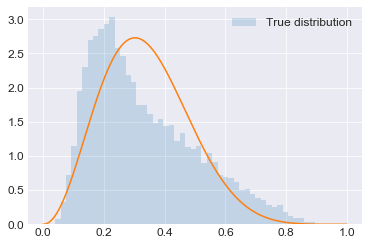

In [23]:
a1, b1, a2, b2, a3, b3, w1, w2 = [v for k, v in optimizer.max['params'].items()]

x = np.linspace(0, 1, 1000)

plt.hist(data, bins=50, alpha=0.2, label='True distribution', density=True)
plt.plot(x, mixture3_pdf(a1, b1, a2, b2, a3, b3, w1, w2, x))

plt.legend()
plt.show()

In [24]:
a1, b1, a2, b2, a3, b3, w1, w2

(3.2496548562739105,
 5.619697307281843,
 3.2252795808411703,
 8.581304445100539,
 4.518946706250415,
 8.372471732870816,
 0.6895138674124569,
 0.4209110306043479)

In [25]:
mixture3_prob(a1, b1, a2, b2, a3, b3, w1, w2)

5250.133875387326

In [26]:
mixture3_prob(1.8, 5.7, 1.8, 5.7, 1.8, 5.7, 1, 1)

3102.858200574662